# THE SPARKS FOUNDATION
# DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP 
## AUTHOR : MEET BHANUSHALI
## Task 2 : Prediction Using Unsupervised Machine Learning

## <font color='orange'>Importing required libraries</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
import warnings as wg
wg.filterwarnings("ignore")

## <font color='orange'>Reading data</font>

In [2]:
iris_data = pd.read_csv('iris_csv.csv')

## <font color='orange'>Understanding data</font>

In [3]:
iris_data.rename(columns = {'sepallength':'Sepal_length','sepalwidth':'Sepal_width','petallength':'Petal_length','petalwidth':'Petal_width','class':'Species'},inplace = True)
iris_data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.shape

(150, 5)

In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris_data.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## <font color='orange'>Checking For Duplicate Entries</font>

In [7]:
iris_data[iris_data.duplicated()]

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


## <font color='orange'>Checking the balance and visualizing</font>

In [8]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

Text(0.5, 1.0, 'Species count')

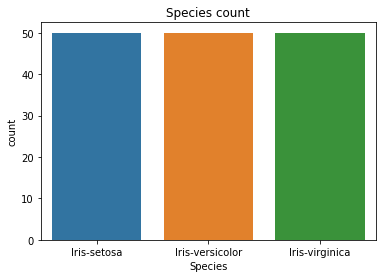

In [9]:
sns.countplot(iris_data['Species'])
plt.title('Species count')

## <font color='orange'>Comparison between various species based on sepal length and width</font>

<AxesSubplot:title={'center':'Comparison between various species based on sapel length and width'}, xlabel='Sepal_length', ylabel='Sepal_width'>

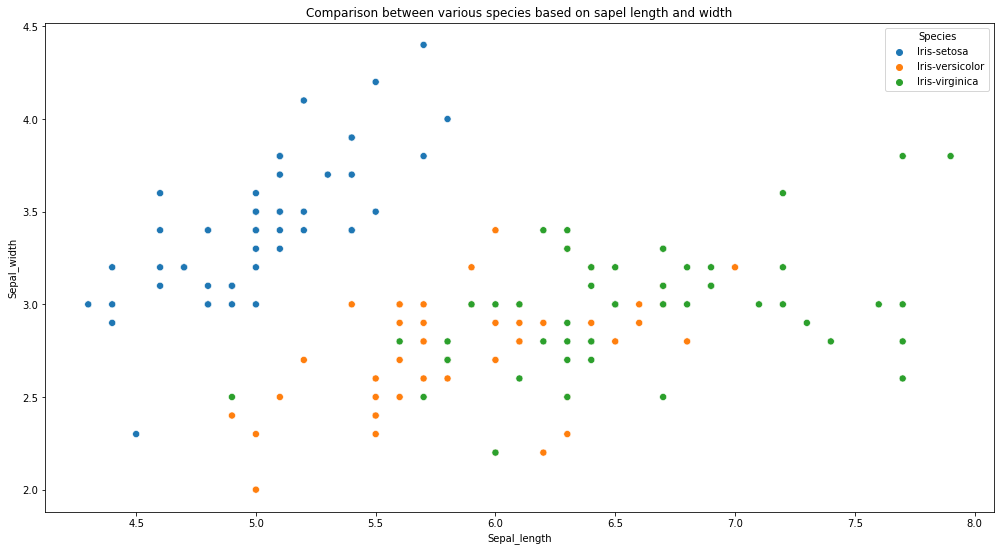

In [10]:
plt.figure(figsize=(17,9))
plt.title('Comparison between various species based on sapel length and width')
sns.scatterplot(iris_data['Sepal_length'],iris_data['Sepal_width'],hue =iris_data['Species'],s=50)

## <font color='orange'>Comparison between various species based on petal length and width</font>

<AxesSubplot:title={'center':'Comparison between various species based on petal length and width'}, xlabel='Petal_length', ylabel='Petal_width'>

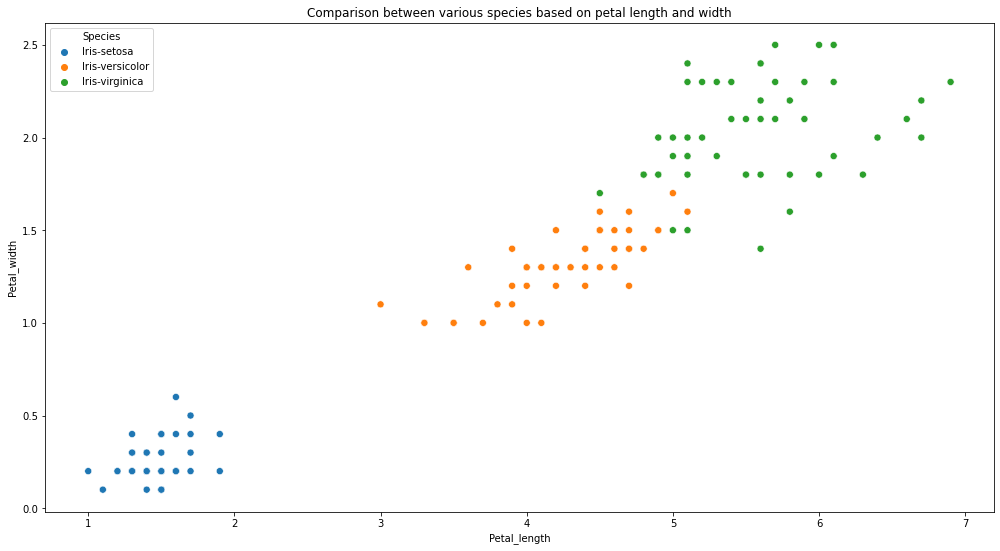

In [11]:
plt.figure(figsize=(17,9))
plt.title('Comparison between various species based on petal length and width')
sns.scatterplot(iris_data['Petal_length'],iris_data['Petal_width'],hue =iris_data['Species'],s=50)

## <font color='orange'>Bi-variate Analysis</font>

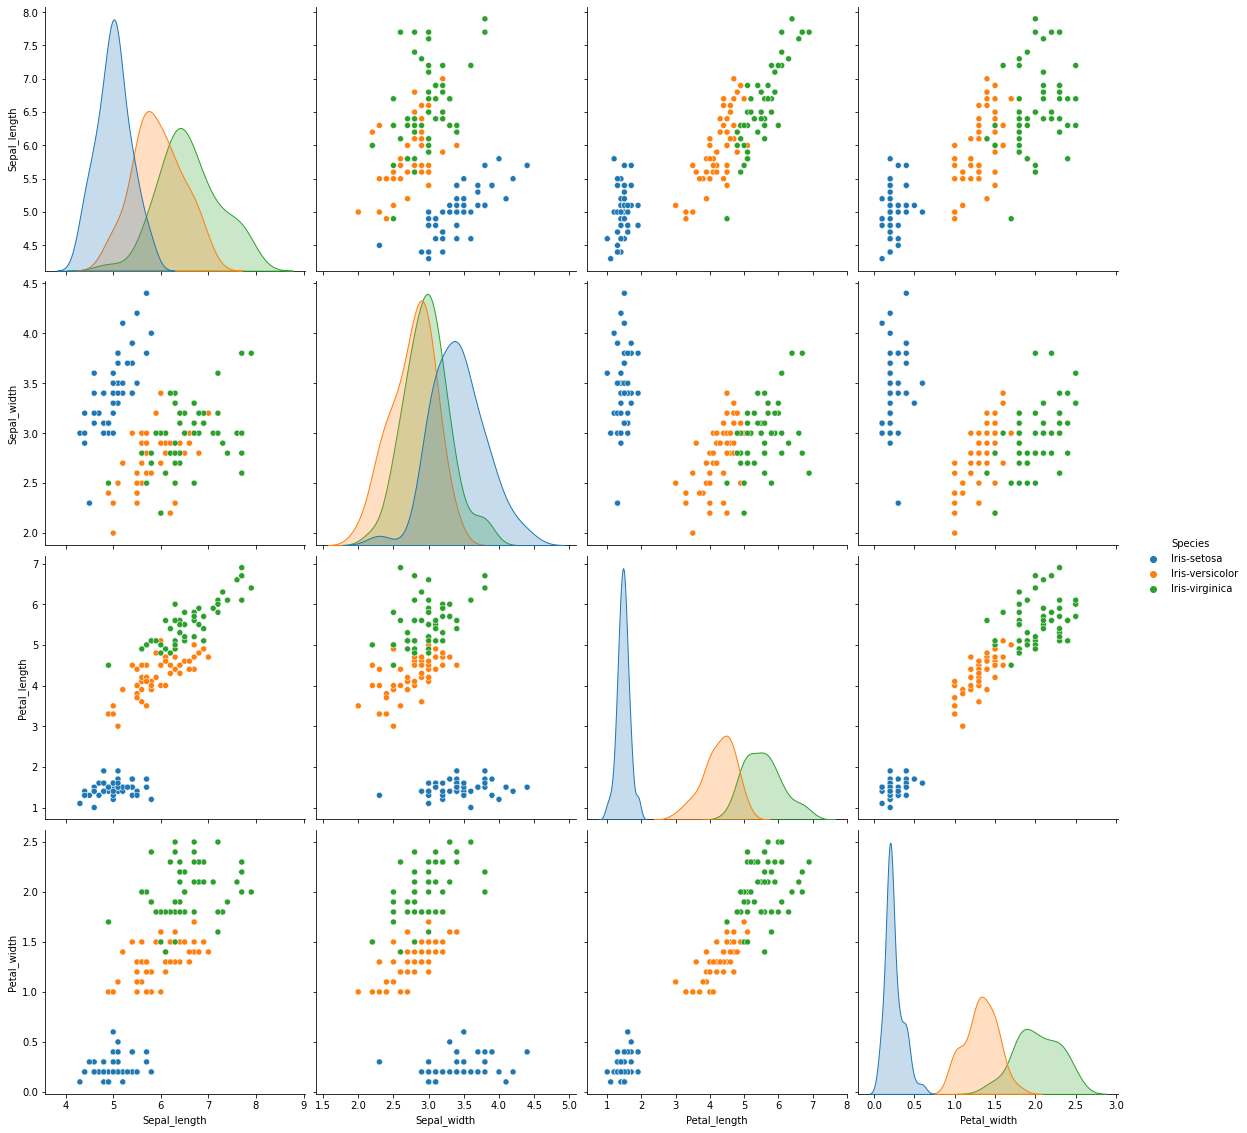

In [12]:
sns.pairplot(iris_data,hue='Species',height=4)

### <font color='orange'>Checking Correlation</font>

[]

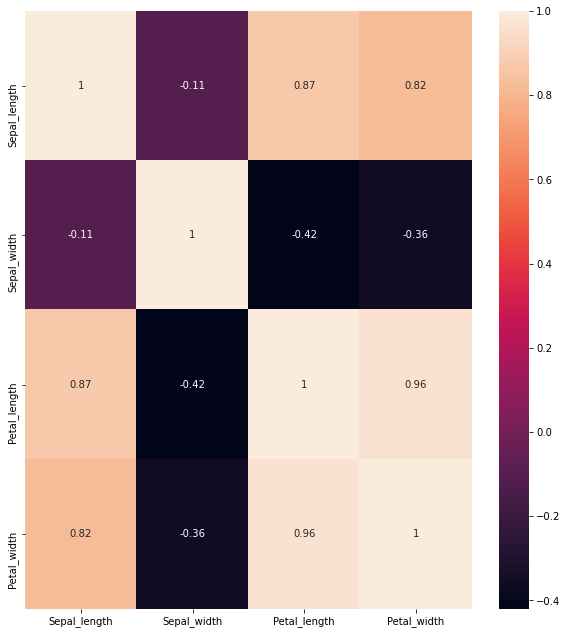

In [13]:
plt.figure(figsize=(10,11))
sns.heatmap(iris_data.corr(),annot=True)
plt.plot()

### <font color='orange'>Finding the optimum number of clusters</font>

In [14]:
x = iris_data.iloc[:,[0,1,2,3]].values

In [15]:
# calculating the withing-cluster sum of square
fitted = []
for i in range(1,21):
    km = KMeans(n_clusters = i , init = 'k-means++', max_iter = 300 , n_init = 10 , random_state = 0)
    km.fit(x)
    fitted.append(km.inertia_)

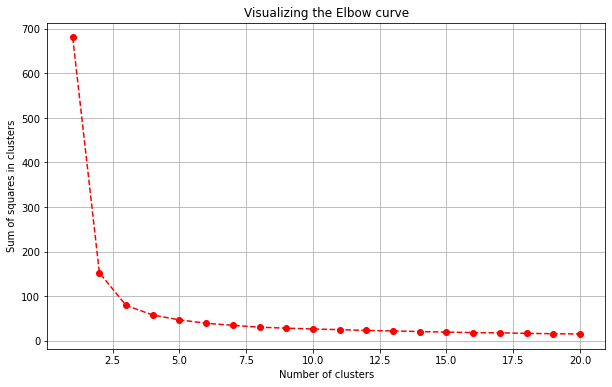

In [16]:
#Plotting the within-cluster sum of square
plt.figure(figsize=(10,6))
plt.plot(range(1,21), fitted,'go--', marker='o',color='red')
plt.title('Visualizing the Elbow curve')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares in clusters')
plt.grid()
plt.show()

## <font color='orange'>Applying k-means clustering on the data</data>

In [17]:
km = KMeans(n_clusters = 3, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
ykmeans = km.fit_predict(x)
ykmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [18]:
print('Center of the clusters : \n\n',km.cluster_centers_)

Center of the clusters : 

 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


### <font color='orange'>Visualizing the clusters and centroids</font>

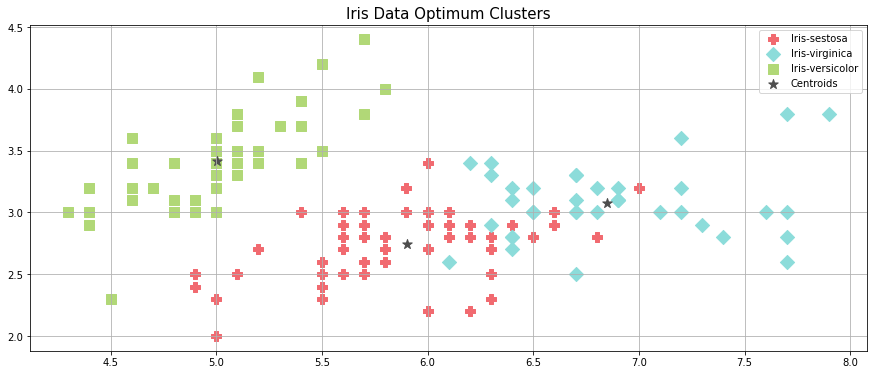

In [19]:
plt.figure(figsize=(15,6))
plt.scatter(x[ykmeans == 0,0], x[ykmeans == 0,1], s=100, c='#f16a70', marker='P',label ='Iris-sestosa')
plt.scatter(x[ykmeans == 2,0], x[ykmeans == 2,1], s=100, c='#8cdcda', marker='D',label ='Iris-virginica')
plt.scatter(x[ykmeans == 1,0], x[ykmeans == 1,1], s=100, c='#b1d877', marker='s',label ='Iris-versicolor')

# Plotting centroids of the clusters
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, c='#4d4d4d',label = 'Centroids',marker='*')
plt.title('Iris Data Optimum Clusters',fontsize = 15)
plt.legend()
plt.grid()
plt.show()